<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/TIME_SERIES_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Modeling (ARIMA Methods) Assignment

In [ ]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Import the Amazon stock price data set (AMZN_data.csv) and plot a line chart with the observed daily closing prices.

In [ ]:
amzn = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [ ]:
amzn['date'] = pd.to_datetime(amzn['date'])
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
def ilinechart(amzn, x, y, groups = None, title=''):
  fig = px.line(amzn, x=x, y=y, color=groups, title=title,
                template='none').update(layout=dict(title=dict(x=0.5)))
  fig.show()

In [ ]:
ilinechart(amzn, 'date', 'close')

### Run an Autoregression (AR) model on the series and add the results to a column in the dataframe.

In [ ]:
model = AR(amzn['close']).fit()
amzn['ar'] = model.predict()


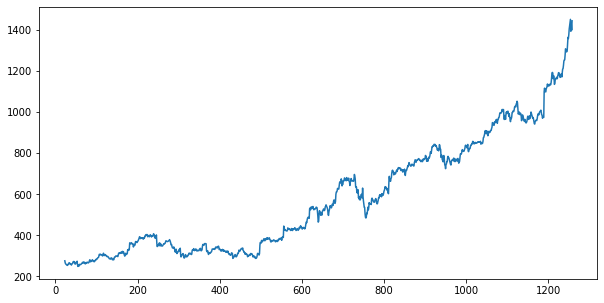

In [ ]:
amzn['ar'].plot(figsize=(10,5))

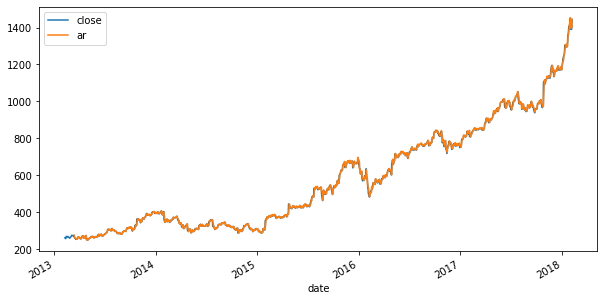

In [ ]:
amzn.set_index('date')[['close', 'ar']].plot(figsize=(10,5))

### Plot a multi-line chart comparing the AR model's results with the observed values.

### Run a Moving Average (MA) model on the series and add the results to a column in the dataframe.

In [ ]:
model = ARMA(amzn['close'], order=(0,1)).fit() #0 lags for AR, need only MA
amzn['ma'] = model.predict()

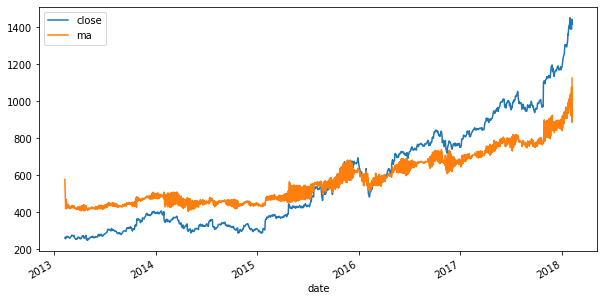

In [ ]:
amzn.set_index('date')[['close', 'ma']].plot(figsize=(10,5))

### Print the model summary and add the model's results to the line chart with observations and the AR model results.

In [ ]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Fri, 30 Oct 2020   AIC                          16101.538
Time:                        13:26:21   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         576.9791      8.063     71.560      0.000     561.176     592.782
ma.L1.close     0.9834      0.004    226.363      0.000       0.975       0.992
                                    Roots       

### Run an Autoregressive Moving Average (ARMA) model on the series and add the results to a column in the dataframe.

Hint: You will need to make the time series stationary in order to run the ARMA model on it. The most common way to do this is by differncing, or subtracting the previous observed value from the current one.

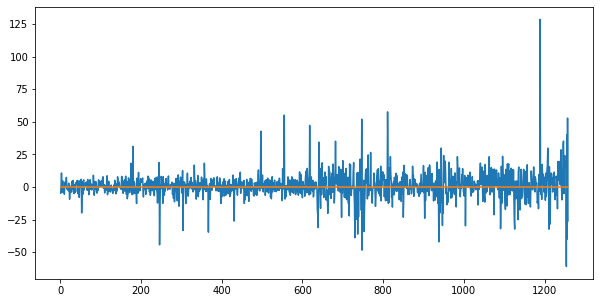

In [ ]:
amzn['diff'] = amzn['close'].diff() #to get the stationarity
amzn.head()
amzn['diff'].plot()

amzn['close'].pct_change().plot(figsize=(10,5)) #daily % change

,date,open,high,low,close,volume,Name,AR,ar,ma,diff
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN,NaN,576.979115,NaN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,NaN,NaN,419.486705,-4.74
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,NaN,NaN,468.819994,1.49
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,NaN,NaN,419.440807,10.77
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,NaN,NaN,457.053053,-0.23


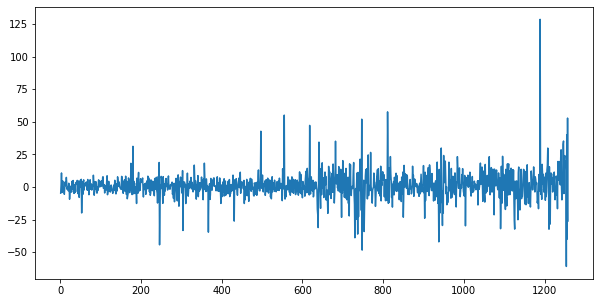

In [ ]:
amzn['diff'] = amzn['close'].diff()
amzn['diff'].plot(figsize=(10,5))
amzn.head()

0            NaN
1      -0.018095
2       0.005793
3       0.041631
4      -0.000854
          ...   
1254   -0.041967
1255    0.028741
1256   -0.027938
1257    0.038014
1258   -0.018062
Name: close, Length: 1259, dtype: float64

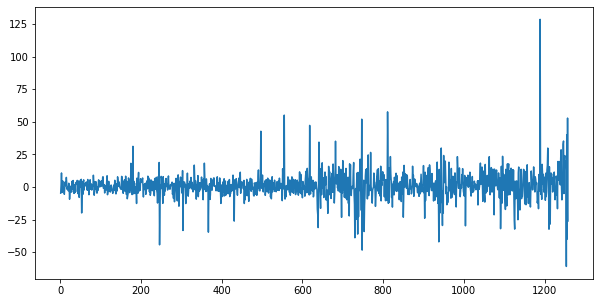

In [ ]:
amzn['diff'] = amzn['close'].diff()
amzn['diff'].plot(figsize=(10,5))

amzn['close'].pct_change()

In [ ]:
amzn['close'] - amzn['close'].shift() #getting the difference
#or 

0         NaN
1       -4.74
2        1.49
3       10.77
4       -0.23
        ...  
1254   -60.89
1255    39.95
1256   -39.95
1257    52.84
1258   -26.06
Name: close, Length: 1259, dtype: float64

In [ ]:
ARMA(amzn['diff'][1:], order=(1,1)).fit()


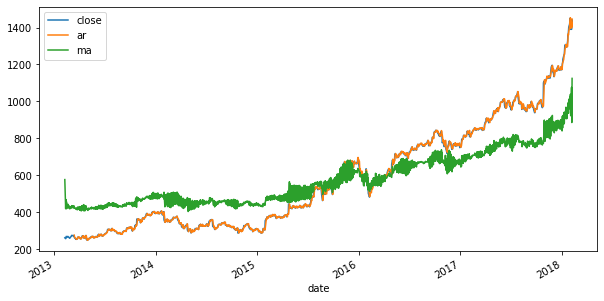

In [ ]:
amzn.set_index('date')[['close', 'ar', 'ma']].plot(figsize=(10,5))

### Print the model summary and generate a multi-line chart that compares the ARMA model's results with those from the AR and MA models.

Hint: You will need to de-difference the model results by adding the previous observed values to them.

### Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

### Print the model summary and generate a multi-line chart that compares the ARIMA model's results to the observed values.

### Run an Seasonal Autoregressive Integrated Moving Average (SARIMA) model on the series and add the results to a column in the dataframe.

### Print the model summary and generate a multi-line chart that compares the SARMA model's results with the observed values.

### Run an Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model on the series and add the results to a column in the dataframe.

Use the daily Open prices as the exogenous factors.

### Print the model summary and generate a multi-line chart that compares the SARMAX model's results with the SARIMA model's values.

### Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.